<a href="https://colab.research.google.com/github/Aryy234/study/blob/ML/7-semester/ML/An%C3%A1lisis_Estad%C3%ADstico_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Realiza la conexion con google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Lee los datos de esta ruta: /content/drive/MyDrive/Colab Notebooks/Aprendizaje automatico/titanic.csv y los traigas al colab

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML2025/data/titanic.csv')
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
#SEPARAR LOS DATOS NUMERICOS DE LOS CATEGORICOS

numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(exclude=['number']).columns

numeric_data = data[numeric_cols]
categorical_data = data[categorical_cols]

print("Numeric columns:\n", numeric_data.head())
print("\nCategorical columns:\n", categorical_data.head())


Numeric columns:
    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

Categorical columns:
                                                 Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked  
0         A/5 21171   NaN        S  
1          PC 17599   C85        C  
2  STON/O2. 3101282   NaN        S  
3            113803  C123        S  
4            3734

In [ ]:

from IPython.display import display

# Asumiendo que 'data' es tu DataFrame original
numeric_data = data.select_dtypes(include=['number'])

# Calcular las estad√≠sticas descriptivas
numeric_stats = numeric_data.describe()

# Mostrar las estad√≠sticas con display
display(numeric_stats)

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

### An√°lisis Estad√≠stico del Conjunto de Datos del Titanic

La tabla muestra estad√≠sticas descriptivas clave para diferentes variables del conjunto de datos del Titanic. A continuaci√≥n, se presentan algunas conclusiones relevantes:

* **Cantidad de Observaciones:** Se tienen 891 registros completos para las variables `PassengerId`, `Survived`, `Pclass`, `SibSp`, `Parch` y `Fare`. La variable `Age` tiene menos registros (714), lo que indica la presencia de valores faltantes en esta columna.

* **Supervivencia:** La media de la columna `Survived` es aproximadamente 0.3838. Esto sugiere que alrededor del 38.4% de los pasajeros en este conjunto de datos sobrevivieron al desastre del Titanic.

* **Clase del Pasajero (Pclass):** La clase promedio del pasajero es de aproximadamente 2.31. Dado que las clases se representan con n√∫meros (presumiblemente 1 para primera clase, 2 para segunda y 3 para tercera), esto indica una tendencia hacia las clases superiores, aunque la mediana (50%) est√° en la tercera clase (3.000000).

* **Edad (Age):** La edad promedio de los pasajeros es de aproximadamente 29.7 a√±os, con una desviaci√≥n est√°ndar de alrededor de 14.5 a√±os. La edad m√≠nima registrada es de 0.42 a√±os (un beb√©), y la m√°xima es de 80 a√±os. El 50% de los pasajeros ten√≠an 28 a√±os o menos.

* **N√∫mero de Hermanos/C√≥nyuges a Bordo (SibSp):** En promedio, los pasajeros ten√≠an alrededor de 0.52 hermanos o c√≥nyuges a bordo. La mayor√≠a de los pasajeros (al menos el 75%) viajaban solos en este aspecto (valor del 75% es 1, pero el 50% y el 25% son 0). El m√°ximo de hermanos/c√≥nyuges a bordo fue de 8.

* **N√∫mero de Padres/Hijos a Bordo (Parch):** El n√∫mero promedio de padres o hijos a bordo era de aproximadamente 0.38. Similar a `SibSp`, la mayor√≠a de los pasajeros (al menos el 75%) viajaban sin padres o hijos a bordo. El m√°ximo de padres/hijos a bordo fue de 6.

* **Tarifa del Boleto (Fare):** La tarifa promedio del boleto fue de aproximadamente 32.20 unidades (la moneda no se especifica). Existe una gran dispersi√≥n en las tarifas, como lo indica la alta desviaci√≥n est√°ndar de alrededor de 49.70. La tarifa m√≠nima fue de 0 (posiblemente boletos gratuitos o de personal), y la tarifa m√°xima fue significativamente alta, de alrededor de 512.33. El 50% de los pasajeros pagaron una tarifa de 14.45 o menos.

En resumen, este an√°lisis descriptivo proporciona una visi√≥n general de las caracter√≠sticas de los pasajeros en el conjunto de datos del Titanic, incluyendo la tasa de supervivencia, la distribuci√≥n por clase, la edad, el n√∫mero de familiares a bordo y las tarifas pagadas. La presencia de valores faltantes en la columna `Age` es un punto a considerar para an√°lisis posteriores.

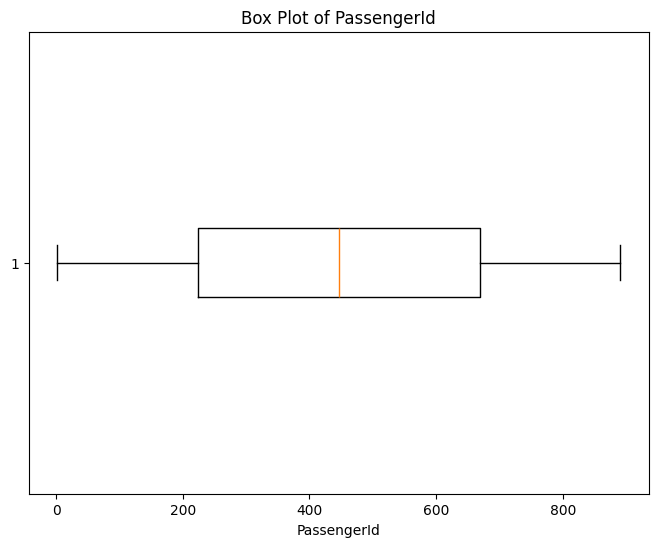

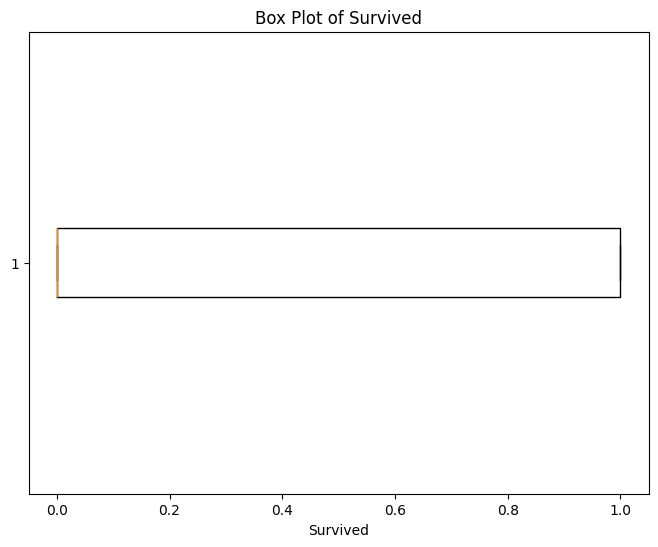

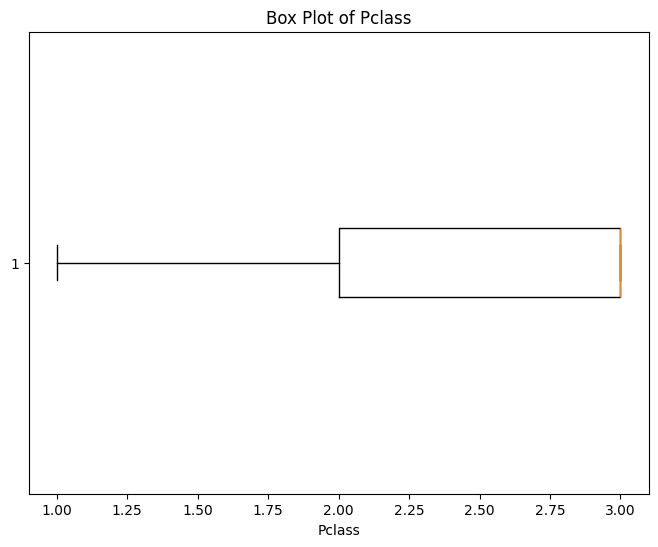

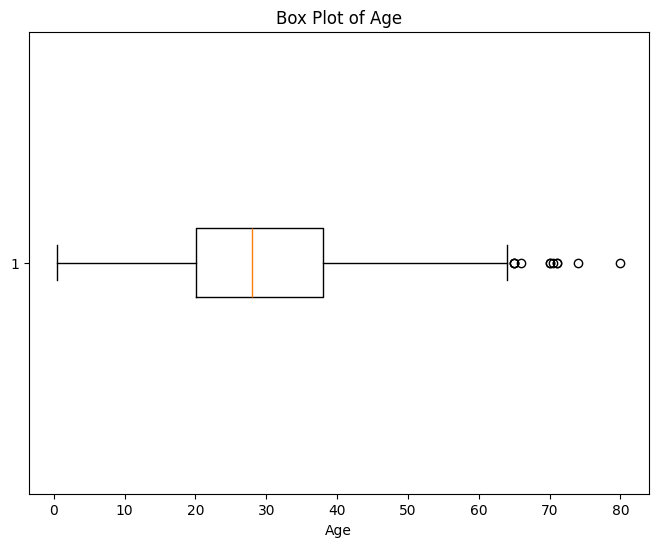

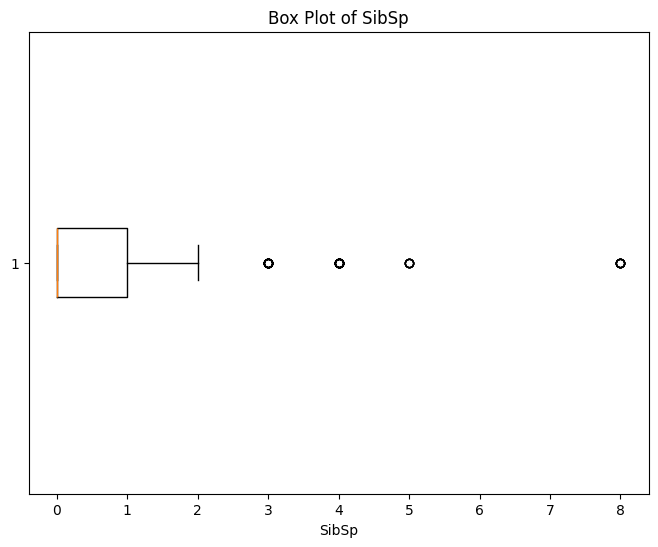

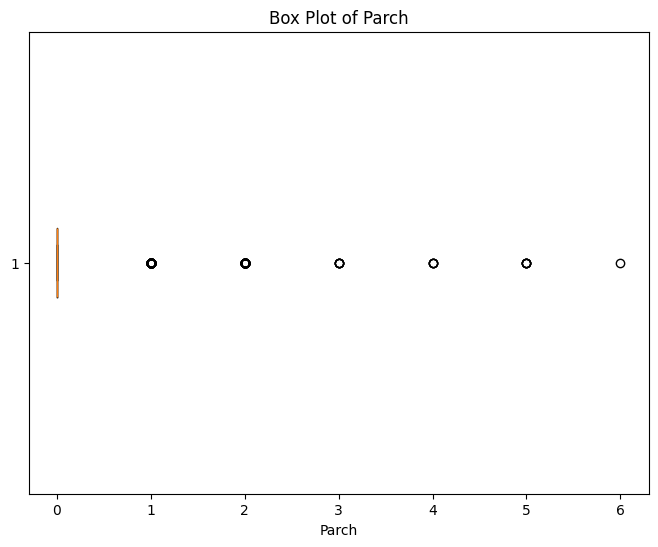

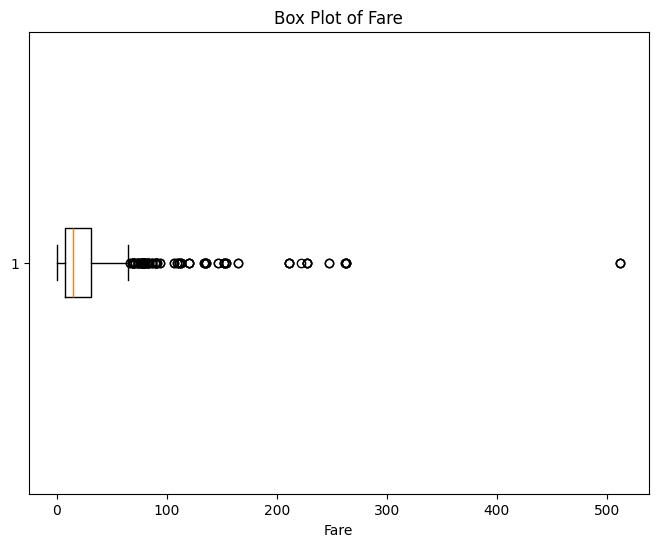

In [ ]:
# prompt: genera los valores atipicos con diagrama de cajas

import matplotlib.pyplot as plt

# Create box plots for each numeric column
for col in numeric_data.columns:
  plt.figure(figsize=(8, 6))  # Adjust figure size if needed
  plt.boxplot(numeric_data[col].dropna(), vert=False)  # Use vert=False for horizontal boxplot
  plt.title(f'Box Plot of {col}')
  plt.xlabel(col)
  plt.show()


In [ ]:
# prompt: Genera en n√∫meros
# limite superior e inferior
# media, mediana
# rango intercuarilico

# Assuming 'numeric_data' DataFrame from the previous code exists

def analyze_numeric_data(df):
    """Analyzes numeric data and prints descriptive statistics."""

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            col_data = df[col].dropna()
            print(f"\nAnalysis for column: {col}")
            print(f"Upper Limit: {col_data.max()}")
            print(f"Lower Limit: {col_data.min()}")
            print(f"Mean: {col_data.mean()}")
            print(f"Median: {col_data.median()}")

            q1 = col_data.quantile(0.25)
            q3 = col_data.quantile(0.75)
            iqr = q3 - q1
            print(f"Interquartile Range (IQR): {iqr}")

analyze_numeric_data(numeric_data)



Analysis for column: PassengerId
Upper Limit: 891
Lower Limit: 1
Mean: 446.0
Median: 446.0
Interquartile Range (IQR): 445.0

Analysis for column: Survived
Upper Limit: 1
Lower Limit: 0
Mean: 0.3838383838383838
Median: 0.0
Interquartile Range (IQR): 1.0

Analysis for column: Pclass
Upper Limit: 3
Lower Limit: 1
Mean: 2.308641975308642
Median: 3.0
Interquartile Range (IQR): 1.0

Analysis for column: Age
Upper Limit: 80.0
Lower Limit: 0.42
Mean: 29.69911764705882
Median: 28.0
Interquartile Range (IQR): 17.875

Analysis for column: SibSp
Upper Limit: 8
Lower Limit: 0
Mean: 0.5230078563411896
Median: 0.0
Interquartile Range (IQR): 1.0

Analysis for column: Parch
Upper Limit: 6
Lower Limit: 0
Mean: 0.38159371492704824
Median: 0.0
Interquartile Range (IQR): 0.0

Analysis for column: Fare
Upper Limit: 512.3292
Lower Limit: 0.0
Mean: 32.204207968574636
Median: 14.4542
Interquartile Range (IQR): 23.0896


### An√°lisis Estad√≠stico Detallado por Columna

A continuaci√≥n, se presenta un an√°lisis m√°s detallado de cada columna del conjunto de datos, basado en las estad√≠sticas proporcionadas:

**An√°lisis para la columna: PassengerId**
* **L√≠mite Superior:** 891
* **L√≠mite Inferior:** 1
* **Media:** 446.0
* **Mediana:** 446.0
* **Rango Intercuart√≠lico (IQR):** 445.0

> La columna `PassengerId` parece ser un identificador √∫nico para cada pasajero. La media y la mediana son iguales, lo que sugiere una distribuci√≥n sim√©trica a lo largo del rango de IDs. El IQR indica la dispersi√≥n del 50% central de los datos.

**An√°lisis para la columna: Survived**
* **L√≠mite Superior:** 1
* **L√≠mite Inferior:** 0
* **Media:** 0.3838383838383838
* **Mediana:** 0.0
* **Rango Intercuart√≠lico (IQR):** 1.0

> Esta columna representa la supervivencia (1 = S√≠, 0 = No). La media de aproximadamente 0.38 indica que alrededor del 38% de los pasajeros sobrevivieron. La mediana de 0 sugiere que la mayor√≠a de los pasajeros no sobrevivieron. El IQR de 1 abarca todo el rango de valores posibles para esta variable binaria.

**An√°lisis para la columna: Pclass**
* **L√≠mite Superior:** 3
* **L√≠mite Inferior:** 1
* **Media:** 2.308641975308642
* **Mediana:** 3.0
* **Rango Intercuart√≠lico (IQR):** 1.0

> `Pclass` representa la clase del pasajero (presumiblemente 1ra, 2da y 3ra clase). La media de alrededor de 2.3 sugiere una tendencia hacia las clases m√°s altas. Sin embargo, la mediana de 3 indica que la mitad de los pasajeros viajaban en tercera clase. El IQR de 1 muestra la dispersi√≥n del 50% central entre una clase.

**An√°lisis para la columna: Age**
* **L√≠mite Superior:** 80.0
* **L√≠mite Inferior:** 0.42
* **Media:** 29.69911764705882
* **Mediana:** 28.0
* **Rango Intercuart√≠lico (IQR):** 17.875

> La edad de los pasajeros var√≠a desde beb√©s hasta personas de 80 a√±os. La media y la mediana son bastante cercanas, lo que sugiere una distribuci√≥n relativamente sim√©trica, aunque el IQR de 17.875 indica una dispersi√≥n considerable en el 50% central de las edades.

**An√°lisis para la columna: SibSp**
* **L√≠mite Superior:** 8
* **L√≠mite Inferior:** 0
* **Media:** 0.5230078563411896
* **Mediana:** 0.0
* **Rango Intercuart√≠lico (IQR):** 1.0

> `SibSp` representa el n√∫mero de hermanos/c√≥nyuges a bordo. La media de alrededor de 0.52 y la mediana de 0 indican que la mayor√≠a de los pasajeros viajaban solos en cuanto a este tipo de familiar. El IQR de 1 sugiere que el 50% central de los pasajeros ten√≠an entre 0 y 1 hermano/c√≥nyuge a bordo.

**An√°lisis para la columna: Parch**
* **L√≠mite Superior:** 6
* **L√≠mite Inferior:** 0
* **Media:** 0.38159371492704824
* **Mediana:** 0.0
* **Rango Intercuart√≠lico (IQR):** 0.0

> `Parch` representa el n√∫mero de padres/hijos a bordo. Similar a `SibSp`, la media de alrededor de 0.38 y la mediana de 0 sugieren que la mayor√≠a de los pasajeros viajaban sin padres o hijos a bordo. Un IQR de 0 indica que el 50% central de los pasajeros no ten√≠an padres ni hijos a bordo.

**An√°lisis para la columna: Fare**
* **L√≠mite Superior:** 512.3292
* **L√≠mite Inferior:** 0.0
* **Media:** 32.204207968574636
* **Mediana:** 14.4542
* **Rango Intercuart√≠lico (IQR):** 23.0896

> `Fare` representa la tarifa del boleto. Existe una gran diferencia entre la media y la mediana, lo que sugiere una distribuci√≥n sesgada hacia la derecha (algunos boletos fueron significativamente m√°s caros). El IQR de 23.0896 indica la dispersi√≥n del 50% central de las tarifas pagadas. La presencia de una tarifa m√≠nima de 0 podr√≠a indicar boletos gratuitos o de personal.

Este an√°lisis proporciona una comprensi√≥n m√°s profunda de la distribuci√≥n y las tendencias centrales de cada variable en el conjunto de datos.


Analysis for column: Age
Upper Limit: 80.0
Lower Limit: 0.42
Interquartile Range (IQR): 17.875


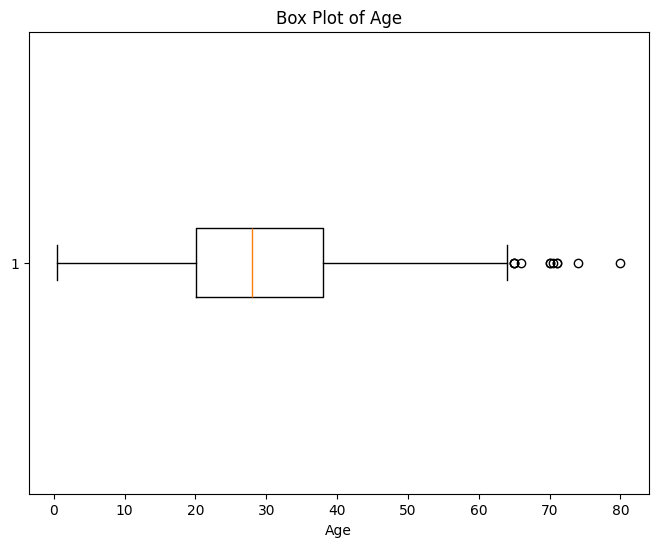


Analysis for column: Fare
Upper Limit: 512.3292
Lower Limit: 0.0
Interquartile Range (IQR): 23.0896


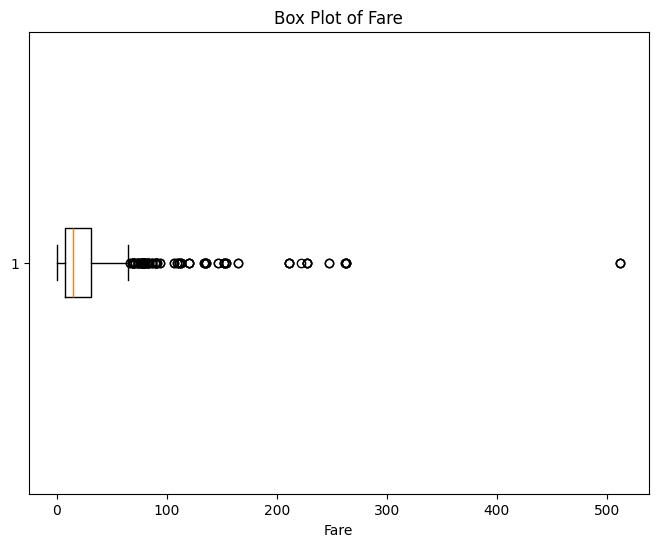

In [ ]:
# prompt: ok el codigo esta bien pero solo quiero que genere de age y fare y se muestre lo siguiente:  el limite superior y el limite inferior para los atributos edad y valor del ticket, junto con el diagrama de caja y bigotes, quiero que muestre los intercuarliles

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it's already loaded
# Replace 'your_file.csv' with the actual path to your CSV file
# data = pd.read_csv('your_file.csv')

# Select only 'Age' and 'Fare' columns
selected_data = data[['Age', 'Fare']]

# Calculate descriptive statistics
def analyze_numeric_data(df):
    """Analyzes numeric data and prints descriptive statistics, including IQR."""
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            col_data = df[col].dropna()
            print(f"\nAnalysis for column: {col}")
            print(f"Upper Limit: {col_data.max()}")
            print(f"Lower Limit: {col_data.min()}")

            q1 = col_data.quantile(0.25)
            q3 = col_data.quantile(0.75)
            iqr = q3 - q1
            print(f"Interquartile Range (IQR): {iqr}")

            # Create box plot
            plt.figure(figsize=(8, 6))
            plt.boxplot(col_data, vert=False)
            plt.title(f'Box Plot of {col}')
            plt.xlabel(col)
            plt.show()

analyze_numeric_data(selected_data)


# üìä An√°lisis de Distribuci√≥n: `Fare` y `Age`

## üéüÔ∏è Columna: `Fare`

**Resumen Estad√≠stico**:
- **L√≠mite Superior**: 512.33
- **L√≠mite Inferior**: 0.0
- **Rango Intercuart√≠lico (IQR)**: 23.09

**Observaciones**:
- La mayor√≠a de los valores se encuentran muy por debajo del l√≠mite superior.
- Se observa una gran cantidad de **valores at√≠picos (outliers)**, especialmente por encima de ~100.
- La distribuci√≥n est√° **fuertemente sesgada a la derecha**, indicando que existen unas pocas tarifas extremadamente altas.
- El valor m√≠nimo de 0 sugiere que algunos pasajeros no pagaron tarifa o esta no fue registrada.

**Conclusi√≥n**:
> La variable `Fare` muestra una distribuci√≥n desigual, con muchos valores extremos hacia la derecha. Para un an√°lisis m√°s robusto o para modelos predictivos, puede ser √∫til aplicar transformaciones como logaritmo o escalamiento para reducir el impacto de los outliers.

---

## üë∂ Columna: `Age`

**Resumen Estad√≠stico**:
- **L√≠mite Superior**: 80.0
- **L√≠mite Inferior**: 0.42
- **Rango Intercuart√≠lico (IQR)**: 17.88

**Observaciones**:
- La mayor√≠a de los datos se encuentran entre los 20 y 40 a√±os aproximadamente.
- Hay algunos valores at√≠picos por encima de los 60 a√±os, aunque son menos frecuentes que en la variable `Fare`.
- La distribuci√≥n es m√°s **sim√©trica**, con una ligera asimetr√≠a hacia la derecha.

**Conclusi√≥n**:
> La variable `Age` est√° m√°s balanceada y tiene menos outliers en comparaci√≥n con `Fare`. Aun as√≠, es importante tener en cuenta la presencia de algunos valores extremos al analizar grupos etarios o al aplicar modelos predictivos.

---
